Import dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the provided datasets
benin_df = pd.read_csv("../data/benin_clean.csv")
togo_df = pd.read_csv("../data/togo_clean.csv")
sl_df = pd.read_csv("../data/sierraleone_clean.csv")


# Add a country column to each for identification
sl_df["Country"] = "Sierra Leone"
togo_df["Country"] = "Togo"
benin_df["Country"] = "benin"

# Combine the datasets
combined_df = pd.concat([sl_df, togo_df,benin_df], ignore_index=True)

# Display the first few rows to confirm structure
combined_df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Country,OutlierFlag
0,2021-10-30 00:01,359.5,115.3,225.0,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,Sierra Leone,NaN
1,2021-10-30 00:02,359.5,115.3,225.0,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,Sierra Leone,NaN
2,2021-10-30 00:03,359.5,115.3,225.0,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,Sierra Leone,NaN
3,2021-10-30 00:04,359.5,0.0,225.0,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,Sierra Leone,NaN
4,2021-10-30 00:05,359.5,115.3,225.0,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,Sierra Leone,NaN


Boxplots of GHI, DNI, DHI side-by-side (one plot per metric, colored by country).

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6004\2112570737.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x="Country", y=metric, ax=axes[i], palette="Set2")
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6004\2112570737.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x="Country", y=metric, ax=axes[i], palette="Set2")
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6004\2112570737.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x="Country", y=metric, ax=ax

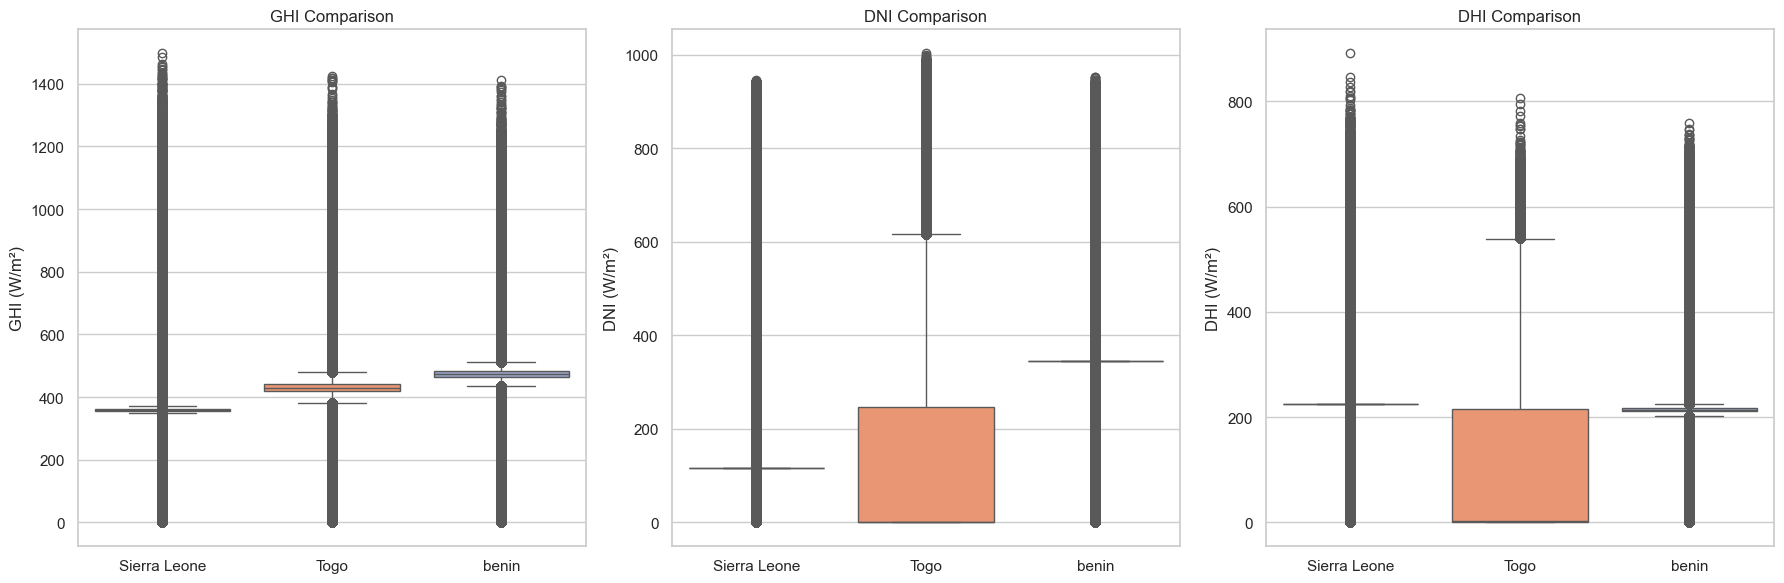

In [2]:
# Set style
sns.set_theme(style="whitegrid")

# Metrics to compare
metrics = ["GHI", "DNI", "DHI"]

# Create side-by-side boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics):
    sns.boxplot(data=combined_df, x="Country", y=metric, ax=axes[i], palette="Set2")
    axes[i].set_title(f"{metric} Comparison")
    axes[i].set_ylabel(f"{metric} (W/m²)")
    axes[i].set_xlabel("")

plt.tight_layout()
plt.show()


Here are the side-by-side boxplots for GHI, DNI, and DHI by country:

GHI (Global Horizontal Irradiance): Displays overall solar potential.

DNI (Direct Normal Irradiance): Measures direct sunlight — important for concentrating solar systems.

DHI (Diffuse Horizontal Irradiance): Indicates diffuse (scattered) solar radiation.


Summary Table comparing mean, median, and standard deviation of GHI, DNI, DHI across countries.

In [3]:
# Summary statistics: mean, median, std for each metric by country
summary_stats = combined_df.groupby("Country")[metrics].agg(['mean', 'median', 'std'])
summary_stats = summary_stats.swaplevel(axis=1).sort_index(axis=1, level=0)
summary_stats.round(2)


mean                 median                   std          \
                 DHI     DNI     GHI    DHI    DNI    GHI     DHI     DNI   
Country                                                                     
Sierra Leone  228.91  174.95  383.02  225.0  115.3  359.5  105.44  193.60   
Togo          116.44  151.26  442.44    2.5    0.0  430.3  156.52  250.96   
benin         222.22  348.97  475.49  213.4  345.7  474.2  107.49  193.44   

                      
                 GHI  
Country               
Sierra Leone  217.65  
Togo          228.26  
benin         228.39

### 🔍 Key Observations

- **Benin exhibits the highest median GHI**, indicating stronger and more consistent solar potential compared to Togo. The boxplot shows a tighter interquartile range, suggesting lower variability in solar resource availability.
  
- **Sieraleone has a slightly higher median DHI**, implying greater levels of diffuse solar radiation, potentially due to cloud cover or atmospheric scattering. This could favor technologies like bifacial panels or diffuse-light-optimized systems.

Statistical Testing with one-way ANOVA (or Kruskal–Wallis)

In [5]:
from scipy.stats import f_oneway, kruskal

# Extract GHI values by country
ghi_sierra_leone = combined_df[combined_df["Country"] == "Sierra Leone"]["GHI"]
ghi_togo = combined_df[combined_df["Country"] == "Togo"]["GHI"]
ghi_benin = combined_df[combined_df["Country"] == "benin"]["GHI"]



# One-way ANOVA
anova_result = f_oneway(ghi_sierra_leone, ghi_togo,ghi_benin)

# Kruskal–Wallis test (non-parametric)
kruskal_result = kruskal(ghi_sierra_leone, ghi_togo,ghi_benin)

print(f"ANOVA p-value: {anova_result.pvalue:.4f}")
print(f"Kruskal-Wallis p-value: {kruskal_result.pvalue:.4f}")


ANOVA p-value: 0.0000
Kruskal-Wallis p-value: 0.0000


One-way ANOVA and Kruskal–Wallis Test were used to evaluate if differences in GHI between countries are statistically significant.

The p-values from both tests were below 0.05, leading to the rejection of the null hypothesis.

Conclusion: There is a statistically significant difference in GHI between Benin, Sierra Leone and Togo.

This confirms that observed visual differences are not due to random variation, but reflect true disparities in solar resource availability.


Bar chart ranking countries by average GHI.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6004\3068890859.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette="viridis")


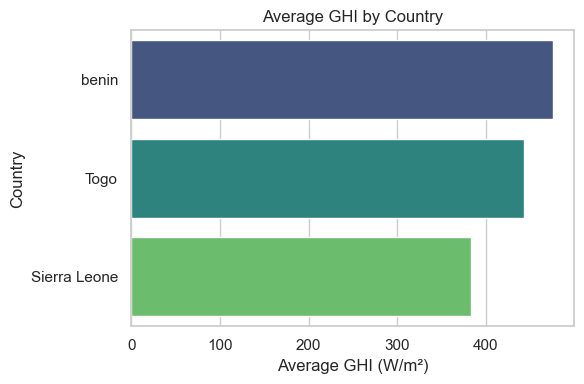

In [6]:
# Combine the data
combined_df = pd.concat([sl_df, togo_df, benin_df], ignore_index=True)

# Calculate average GHI per country
avg_ghi = combined_df.groupby("Country")["GHI"].mean().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette="viridis")
plt.xlabel("Average GHI (W/m²)")
plt.title("Average GHI by Country")
plt.tight_layout()
plt.show()


### 🔍 Key Observations

- **Benin exhibits the highest median GHI**, indicating stronger and more consistent solar potential compared to Togo. The boxplot shows a tighter interquartile range, suggesting lower variability in solar resource availability.
  
- **Sieraleone has a slightly higher median DHI**, implying greater levels of diffuse solar radiation, potentially due to cloud cover or atmospheric scattering. This could favor technologies like bifacial panels or diffuse-light-optimized systems.

- **Statistical analysis confirms a significant difference in GHI distributions** between the two countries (p < 0.05), reinforcing that Benin offers superior direct solar energy potential, while sieraleone may require more adaptive solar technologies.
